最尤推定 ξ: 0.19130700948882756 σ: 0.7891387175198331 RV: 20.81006576448362
最尤推定 ξ: 0.5647382920110192 σ: 0.6011767034458452 RV: 33.202249293187414
82.07882207865566 %の確率で極値増加
最尤推定 ξ: 0.19130700948882756 σ: 0.7891387175198331 RV: 20.81006576448362
最尤推定 ξ: 0.35965717783899565 σ: 0.9749463467329442 RV: 29.030225021009894
77.84758136479041 %の確率で極値増加
最尤推定 ξ: 0.19130700948882756 σ: 0.7891387175198331 RV: 20.81006576448362
最尤推定 ξ: 0.31986531986531985 σ: 0.9254010039670147 RV: 26.297313250329992
71.9498429342322 %の確率で極値増加


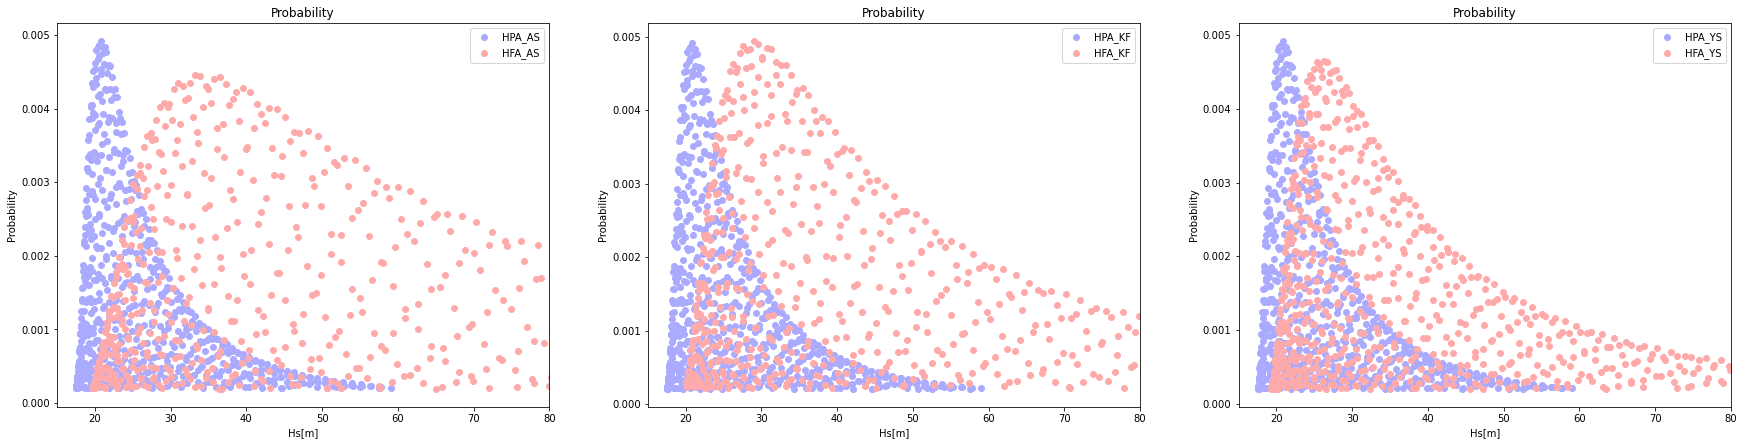

In [9]:
"""
LWMの出力結果を用いて, 極値増大確率を算出する.
"""

import func
from csv import reader
import matplotlib.pyplot as plt

MODEL = ['AS', 'KF', 'YS']
INDEX = [68]

def calc_p(past_rv, past_pro, f_rv, f_pro):
    """
    将来分布の中で, hsより大きい値を取る確率を合計する
    """
    P = 0
    for i in range(len(past_rv)):
        p = 0
        for j in range(len(f_rv)):
            if f_rv[j] > past_rv[i]:
                p += f_pro[j]
        P += past_pro[i] * p
    return P * 100

# 描画用の画像を用意
fig = plt.figure(figsize=(30, 24))
for index in range(len(INDEX)):
    idx = INDEX[index]
    for i in range(3):
        is_ok = True  # データ数が50以上あるかどうかのFlag(なければその地点は使用しない)
        for j in range(2):
            model = MODEL[i]
            # CSV名を指定するためにmodel名を変更
            if j == 0:  # 過去
                model = 'HPA_' + model
            else:  # 未来
                model = 'HFA_' + model + '_c0'
            
            with open('../pot_csv/' + model + '_POT_DATA.csv', 'r') as csv_file:
                csv_reader = reader(csv_file)
                POT_ALL = list(csv_reader)
            POT = POT_ALL[idx] # 指定した場所のPOTを抽出
            # POTは文字列のリストになっているので, float型に変換する
            s = []
            for k in range(len(POT)):
                s.append(float(POT[k]))
            s = sorted(s, reverse=True)
            if len(POT) < 50:
                is_ok = False
                print("データ数：", len(POT), "データ数が不足しているため, この地点は使用できません")
            else:
                POT = s[:50]
                if j == 0:  # 過去
                    past_rv, past_pro = func.lwm_gpd(data=POT, error=[0.005], thr=POT[-1], n=219143, n0=50, con=0.95)
                else:  # 将来
                    f_rv, f_pro = func.lwm_gpd(data=POT, error=[0.005], thr=POT[-1], n=219143, n0=50, con=0.95)
        
        if is_ok:
            P = calc_p(past_rv, past_pro, f_rv, f_pro)
            print(P, '%の確率で極値増加')
            ax = fig.add_subplot(3, 3, 3 * index + i + 1)
            ax.scatter(past_rv, past_pro, c='#aaaaFF')
            ax.scatter(f_rv, f_pro, c='#FFaaaa')
            ax.legend(['HPA_' + model[4:6], model[:-3]])
            ax.set_title("Probability")
            ax.set_xlabel("Hs[m]")
            ax.set_ylabel("Probability")
            ax.set_xlim((15, 80))

plt.savefig("../img/prob_of_hs.png")
plt.show()

最尤推定 ξ: 0.19130700948882756 σ: 0.7891387175198331 RV: 20.81006576448362
最尤推定 ξ: 0.5647382920110192 σ: 0.6011767034458452 RV: 33.202249293187414
89.0144817604705 %の確率で極値増加
最尤推定 ξ: 0.19130700948882756 σ: 0.7891387175198331 RV: 20.81006576448362
最尤推定 ξ: 0.35965717783899565 σ: 0.9749463467329442 RV: 29.030225021009894
84.30559379228264 %の確率で極値増加
最尤推定 ξ: 0.19130700948882756 σ: 0.7891387175198331 RV: 20.81006576448362
最尤推定 ξ: 0.31986531986531985 σ: 0.9254010039670147 RV: 26.297313250329992
77.96522177614663 %の確率で極値増加


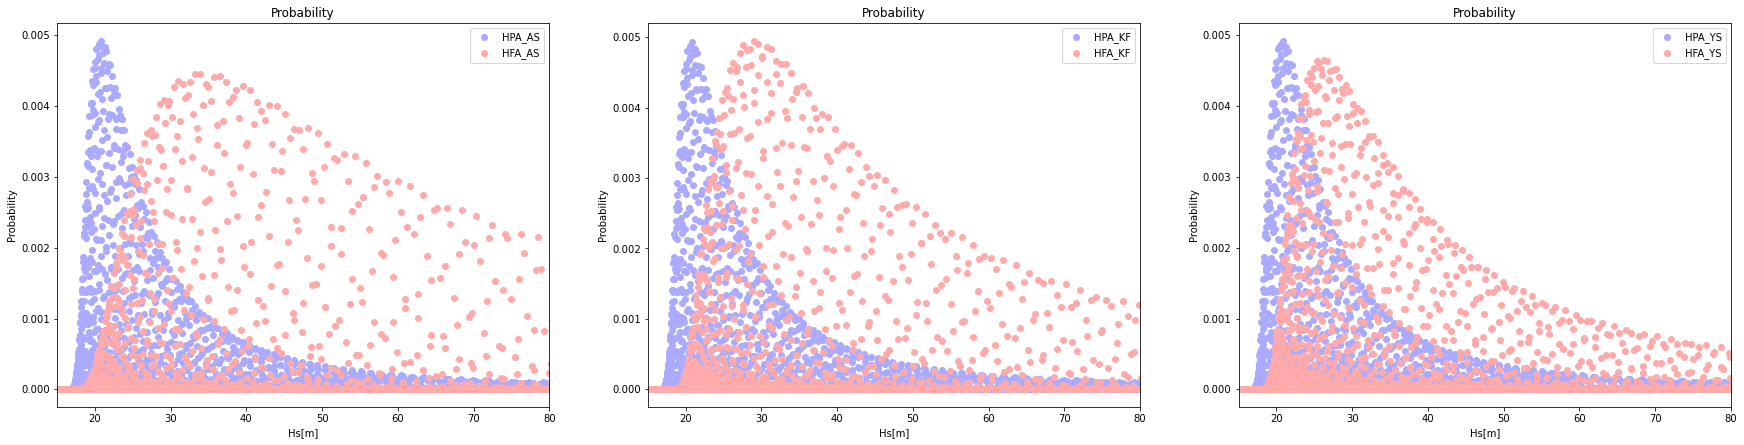

In [10]:
import func
from csv import reader
import matplotlib.pyplot as plt

MODEL = ['AS', 'KF', 'YS']
INDEX = [68]

def calc_p(past_rv, past_pro, f_rv, f_pro):
    """
    将来分布の中で, hsより大きい値を取る確率を合計する
    """
    P = 0
    for i in range(len(past_rv)):
        p = 0
        for j in range(len(f_rv)):
            if f_rv[j] > past_rv[i]:
                p += f_pro[j]
        P += past_pro[i] * p
    return P * 100

# 描画用の画像を用意
fig = plt.figure(figsize=(30, 24))
for index in range(len(INDEX)):
    idx = INDEX[index]
    for i in range(3):
        is_ok = True  # データ数が50以上あるかどうかのFlag(なければその地点は使用しない)
        for j in range(2):
            model = MODEL[i]
            # CSV名を指定するためにmodel名を変更
            if j == 0:  # 過去
                model = 'HPA_' + model
            else:  # 未来
                model = 'HFA_' + model + '_c0'
            
            with open('../pot_csv/' + model + '_POT_DATA.csv', 'r') as csv_file:
                csv_reader = reader(csv_file)
                POT_ALL = list(csv_reader)
            POT = POT_ALL[idx] # 指定した場所のPOTを抽出
            # POTは文字列のリストになっているので, float型に変換する
            s = []
            for k in range(len(POT)):
                s.append(float(POT[k]))
            s = sorted(s, reverse=True)
            if len(POT) < 50:
                is_ok = False
                print("データ数：", len(POT), "データ数が不足しているため, この地点は使用できません")
            else:
                POT = s[:50]
                if j == 0:  # 過去
                    past_rv, past_pro = func.lwm_gpd(data=POT, error=[0.005], thr=POT[-1], n=219143, n0=50, con=1.0)
                else:  # 将来
                    f_rv, f_pro = func.lwm_gpd(data=POT, error=[0.005], thr=POT[-1], n=219143, n0=50, con=1.0)
        
        if is_ok:
            P = calc_p(past_rv, past_pro, f_rv, f_pro)
            print(P, '%の確率で極値増加')
            ax = fig.add_subplot(3, 3, 3 * index + i + 1)
            ax.scatter(past_rv, past_pro, c='#aaaaFF')
            ax.scatter(f_rv, f_pro, c='#FFaaaa')
            ax.legend(['HPA_' + model[4:6], model[:-3]])
            ax.set_title("Probability")
            ax.set_xlabel("Hs[m]")
            ax.set_ylabel("Probability")
            ax.set_xlim((15, 80))

plt.savefig("../img/prob_of_hs.png")
plt.show()